# Praktikum 1 - Klasifikasi Iris dengan Perceptron

**Nama : Nanda Putra Khamdani**

**Kelas : TI-3H / 18**

**NIM : 2241720180**


  ### Deskripsi

  Pada pratikum ini, Anda diminta untuk melakukan klasifikasi bunga iris dengan menggunakan model Perceptron. Anda dapat menggunakan dataset iris pada praktikum sebelumnya.

  Untuk nembah pemahaman Anda terkait dengan model Perceptron, pada pratkikum ini Anda akan membuat model Perceptron tanpa menggunakan library.



* Langkah 1 - Import Library

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

* Langkah 2 - Load Data dan Visualisasi

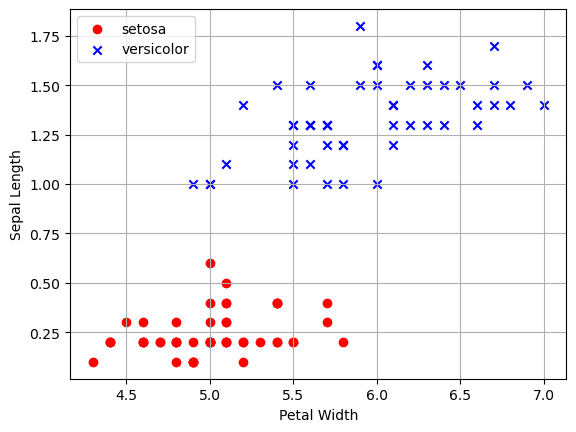

In [42]:
df = pd.read_csv('../Jobsheet9_Perceptron-ANN/Data/Iris.csv')

setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

a, b = 'SepalLengthCm', 'PetalWidthCm'
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Kode di atas digunakan untuk memvisualisasikan hubungan antara dua fitur pada dataset Iris untuk dua spesies bunga, yaitu Iris-setosa dan Iris-versicolor. Pertama, dataset Iris.csv dimuat menggunakan pd.read_csv, lalu data untuk setiap spesies difilter menggunakan perintah df[df['Species'] == 'nama_spesies']. Selanjutnya, dua variabel, yaitu SepalLengthCm dan PetalWidthCm, digunakan sebagai sumbu x dan y pada plot. Data untuk spesies setosa divisualisasikan dengan titik berwarna merah dan simbol lingkaran, sementara spesies versicolor divisualisasikan dengan titik berwarna biru dan simbol silang. Judul untuk sumbu x dan y diatur sebagai Petal Width dan Sepal Length

---

* Langkah 3 - Membuat Kelas Perceptron

In [43]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        X = np.array(X)
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Kode di atas mendefinisikan kelas Perceptron. Kelas ini memiliki dua parameter utama: eta (laju pembelajaran) dan n_iter (jumlah iterasi pelatihan).

Metode fit digunakan untuk melatih model menggunakan data input X dan target label y. Bobot awal (w_) diinisialisasi dengan nol. Pada setiap iterasi, bobot diperbarui berdasarkan selisih antara nilai target dan prediksi. Pembaruan dilakukan dengan mengalikan laju pembelajaran (eta) dengan kesalahan prediksi, lalu menambahkan hasil pembaruan ke bias (w_[0]) dan bobot lainnya (w_[1:]). Jumlah kesalahan per iterasi dicatat dalam errors_.

Metode net_input menghitung input bersih (dot product antara input X dan bobot), sementara metode predict mengembalikan klasifikasi biner berdasarkan apakah nilai input bersih lebih besar atau sama dengan 0 (menghasilkan 1) atau kurang dari 0 (menghasilkan -1).

---

* Langkah 4 - Pilih Data dan Encoding Label

In [44]:
y = df.iloc[0:100, 5].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [1, 4]].values # slice data latih

Kode di atas mempersiapkan data dari dataset Iris untuk digunakan dalam model klasifikasi biner. Variabel y diambil dari 100 baris pertama kolom Species dan labelnya di-encode sehingga Iris-setosa diberi nilai -1 dan spesies lain diberi nilai 1. Selanjutnya, dua fitur (panjang sepal dan lebar petal) dari 100 baris pertama dipilih dan disimpan dalam variabel X sebagai data latih.

---

In [45]:
# Mencetak nilai X dan y
print("X (Fitur):")
print(X)
print("\ny (Label):")
print(y)

X (Fitur):
[[5.1 0.2]
 [4.9 0.2]
 [4.7 0.2]
 [4.6 0.2]
 [5.  0.2]
 [5.4 0.4]
 [4.6 0.3]
 [5.  0.2]
 [4.4 0.2]
 [4.9 0.1]
 [5.4 0.2]
 [4.8 0.2]
 [4.8 0.1]
 [4.3 0.1]
 [5.8 0.2]
 [5.7 0.4]
 [5.4 0.4]
 [5.1 0.3]
 [5.7 0.3]
 [5.1 0.3]
 [5.4 0.2]
 [5.1 0.4]
 [4.6 0.2]
 [5.1 0.5]
 [4.8 0.2]
 [5.  0.2]
 [5.  0.4]
 [5.2 0.2]
 [5.2 0.2]
 [4.7 0.2]
 [4.8 0.2]
 [5.4 0.4]
 [5.2 0.1]
 [5.5 0.2]
 [4.9 0.1]
 [5.  0.2]
 [5.5 0.2]
 [4.9 0.1]
 [4.4 0.2]
 [5.1 0.2]
 [5.  0.3]
 [4.5 0.3]
 [4.4 0.2]
 [5.  0.6]
 [5.1 0.4]
 [4.8 0.3]
 [5.1 0.2]
 [4.6 0.2]
 [5.3 0.2]
 [5.  0.2]
 [7.  1.4]
 [6.4 1.5]
 [6.9 1.5]
 [5.5 1.3]
 [6.5 1.5]
 [5.7 1.3]
 [6.3 1.6]
 [4.9 1. ]
 [6.6 1.3]
 [5.2 1.4]
 [5.  1. ]
 [5.9 1.5]
 [6.  1. ]
 [6.1 1.4]
 [5.6 1.3]
 [6.7 1.4]
 [5.6 1.5]
 [5.8 1. ]
 [6.2 1.5]
 [5.6 1.1]
 [5.9 1.8]
 [6.1 1.3]
 [6.3 1.5]
 [6.1 1.2]
 [6.4 1.3]
 [6.6 1.4]
 [6.8 1.4]
 [6.7 1.7]
 [6.  1.5]
 [5.7 1. ]
 [5.5 1.1]
 [5.5 1. ]
 [5.8 1.2]
 [6.  1.6]
 [5.4 1.5]
 [6.  1.6]
 [6.7 1.5]
 [6.3 1.3]
 [5.6 1.3]
 [5.5 1.3]

* Langkah 5 - Fitting Model

In [46]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

Kode di atas digunakan untuk melatih model Perceptron dengan data yang telah disiapkan. Objek ppn dibuat dari kelas Perceptron dengan laju pembelajaran (eta) sebesar 0.1 dan jumlah iterasi pelatihan (n_iter) sebanyak 10. Model tersebut kemudian dilatih menggunakan data fitur X dan label y dengan memanggil metode fit. Model ini akan memperbarui bobotnya berdasarkan kesalahan prediksi selama 10 iterasi untuk mempelajari hubungan antara fitur dan label.

---

* Langkah 6 - Visualisasi Nilai Error Per Epoch

PPN Erros:  [2, 2, 2, 3, 2, 1, 0, 0, 0, 0]


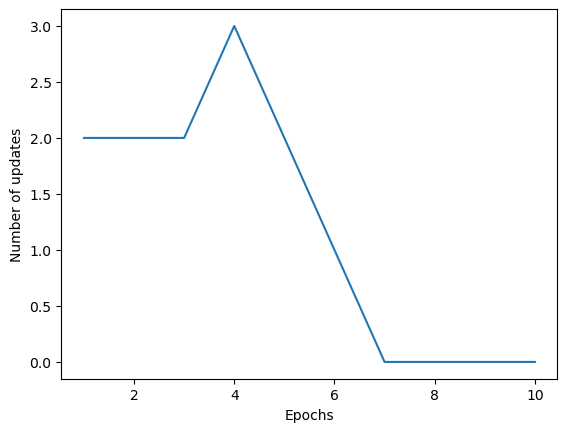

In [47]:
print(f"PPN Erros: ", ppn.errors_)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

* Langkah 7 - Visualiasasi Decision Boundary

In [48]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    print(f"x1_min: {x1_min}, x1_max: {x1_max}, x2_min: {x2_min}, x2_max: {x2_max}")  # Debug print
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

Kode di atas mendefinisikan fungsi plot_decision_regions yang digunakan untuk memvisualisasikan decision boundary dari sebuah model klasifikasi pada data dua dimensi. Fungsi ini menerima input berupa data fitur X, label y, model classifier, dan resolusi grid.

Pertama, fungsi menyiapkan penanda (markers) dan warna untuk setiap kelas berdasarkan jumlah kelas unik di y. Kemudian, fungsi membuat grid 2D menggunakan meshgrid untuk mencakup rentang nilai fitur pertama dan kedua, ditambah margin.

Setelah grid dibuat, model klasifikasi menggunakan metode predict untuk memprediksi kelas dari setiap titik di grid. Hasil prediksi kemudian dibentuk ulang sesuai dengan bentuk grid dan digunakan untuk menggambar decision boundary dengan fungsi contourf dari Matplotlib.

Akhirnya, fungsi ini juga memplot titik data asli dengan penanda dan warna yang berbeda untuk setiap kelas, sehingga decision boundary dan data asli dapat dibandingkan secara visual.

---

x1_min: 3.3, x1_max: 8.0, x2_min: -0.9, x2_max: 2.8


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12136\3324269864.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


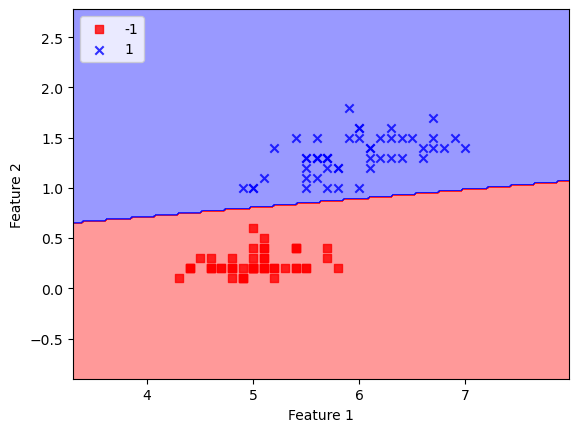

In [49]:
# Panggil fungsi untuk plot decision region
plot_decision_regions(X, y, classifier=ppn)

# Tambahkan label dan tampilkan
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.show()